# Softmax General

For softmax in multiple dimensions, the parameter w for each class is a vector.

- Input data matrices: $X$

$$X = \begin{bmatrix}
x_{11} & x_{12} & \cdots &x_{1D}\\
x_{21} & x_{22} & \cdots &x_{2D}\\
\vdots & \vdots & \ddots &\vdots\\
x_{K1} & x_{K2} & \cdots &x_{KD}
\end{bmatrix}_{K\times D}$$

- weight matrix:
$$W = \begin{bmatrix}
w_{11} & w_{12} & \cdots & w_{1D}\\
w_{21} & w_{22} & \cdots & w_{2D}\\
\vdots & \vdots & \ddots & \vdots\\
w_{N1} & w_{N2} & \cdots & w_{ND}
\end{bmatrix}_{N\times D}$$

- bias matrix:\
$$B = \begin{bmatrix}
b_1 &\cdots & b_{N}\\
\vdots & \ddots & \vdots\\
b_1 &\cdots & b_{N}
\end{bmatrix}_{K\times N}$$

where $N$ is a number of output class and  $K$ is a number of samples and $D$ is a number of features.

$$Z = XW^T + B$$

## Prediction

- target classes:
$$Z_i = [z_{i1}, z_{i2}, \ldots, z_{iN}]$$

- predict function:

$$\hat{Y} = \begin{bmatrix}
\hat{y}_1\\
\vdots\\
\hat{y}_K
\end{bmatrix} = \begin{bmatrix}
\underset{n}{\operatorname{argmax}}Z_1\\
\vdots\\
\underset{n}{\operatorname{argmax}}Z_K
\end{bmatrix}$$

where $n \in \{1, 2, \ldots, N\}$

In [1]:
import torch
from torch import nn, optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pyplot as plt
torch.manual_seed(1)

C:\Users\User\anaconda3\envs\AIML\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\User\anaconda3\envs\AIML\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
model = SoftMax(2, 3)

In [4]:
x = torch.tensor([[1.0, 2.0]])
z = model(x)

In [5]:
_, yhat = z.max(1)

In [6]:
yhat

tensor([1])

In [7]:
X = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]])
Z = model(X)

In [8]:
_, Yhat = Z.max(1)

In [9]:
Yhat

tensor([1, 1, 1])

# Train

In [10]:
#download data
train_dataset = dsets.MNIST(root = './data',  train = True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './data',  train = False, download = True, transform = transforms.ToTensor())

In [11]:
#Model
input_dim = 28 * 28
output_dim = 10

model = SoftMax(input_dim, output_dim)

In [12]:
print('W:', list(model.parameters())[0].size())
print('b:', list(model.parameters())[1].size())

W: torch.Size([10, 784])
b: torch.Size([10])


In [13]:
#data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)

In [14]:
#Training
N_test = validation_dataset.data.shape[0]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
n_epochs = 5
accuracy_list = []

for epoch in range(n_epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        
    correct = 0
    for x_test, y_test in validation_dataset:
        z = model(x_test.view(-1, 28 * 28))
        _, yhat = torch.max(z.data, 1)
        correct = correct + (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

In [15]:
accuracy_list

[0.8557, 0.8758, 0.8838, 0.8895, 0.8928]

In [16]:
import seaborn as sns; sns.set_theme()

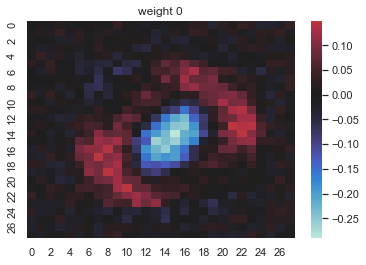

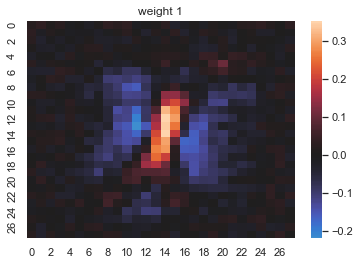

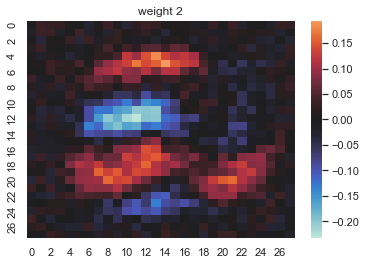

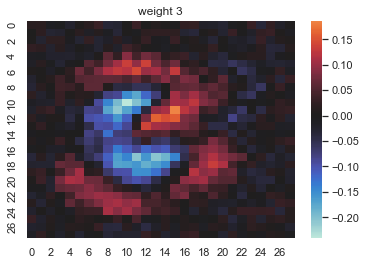

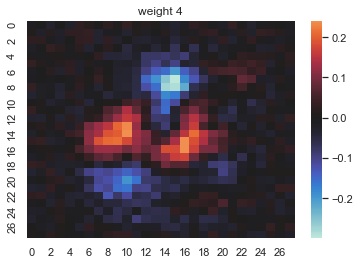

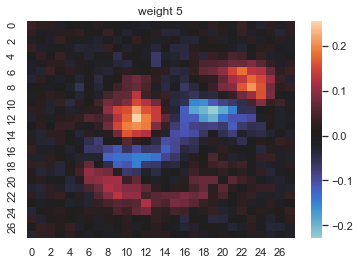

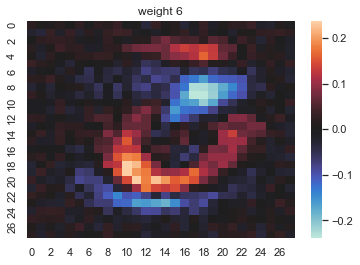

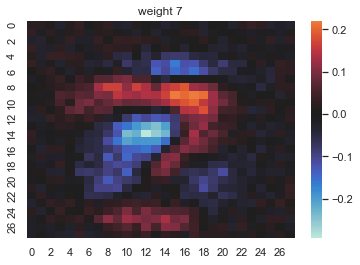

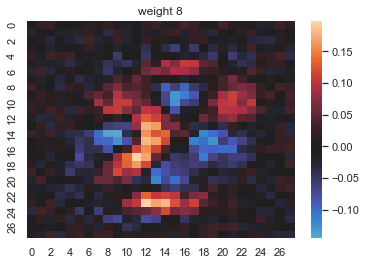

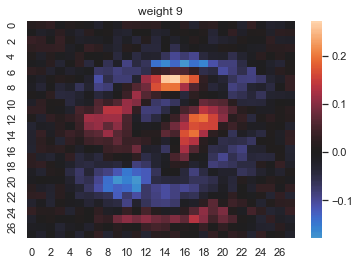

In [39]:
number = 0
for w in list(model.parameters())[0]:
    param = w.detach().numpy().reshape(28 , 28)
    ax = sns.heatmap(param, center=0)
    plt.title(f'weight {number}')
    plt.show()
    number += 1